### predicting the China GDP using logistic regression from scracth in python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Independent Variable')

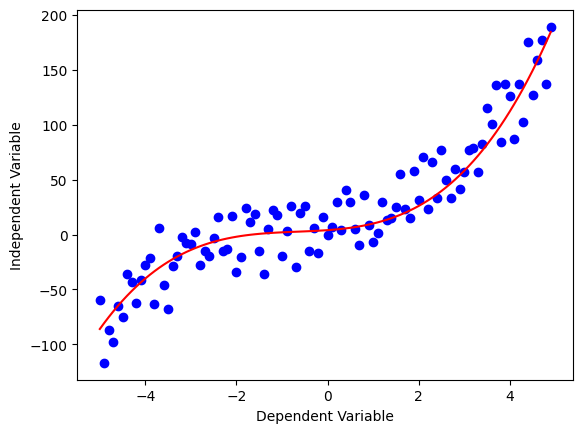

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
x
y = 1 * (x ** 3) + 2 * (x ** 2) + 3 * x + 4
y_noise = 20 * np.random.normal(size=x.size) 
# y_noise = np.random.normal(size=x.size) 
# print(y_noise)
y_data = y_noise + y
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable")

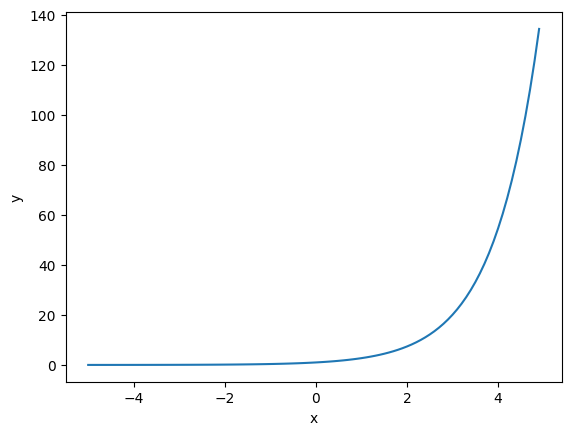

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
# print(y)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Sigmoid / Logistic

$$ Y = a + \frac{b}{1 + c^{(X-d)}}

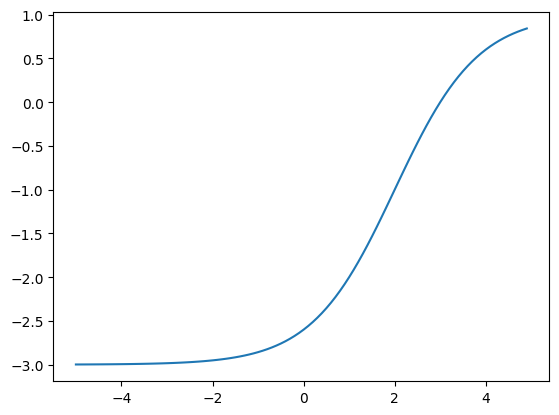

In [7]:
# Sigmoid plot
x = np.arange(-5.0, 5.0, 0.1)
# print(x)
y = 1 - (4 / (1 + np.power(3, x - 2)))
# print(y)
plt.plot(x, y)


$$ y = \frac{1}{1 + e^{-x}}

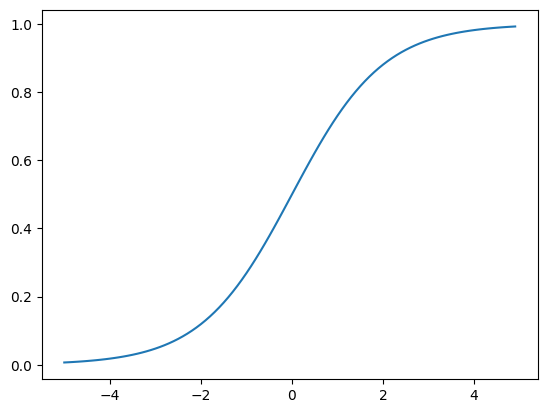

In [8]:
y = (1 / (1 + np.exp(-x)))
plt.plot(x, y)

In [9]:
#Prediction of china GDP
df = pd.read_csv("./datasets/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [11]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


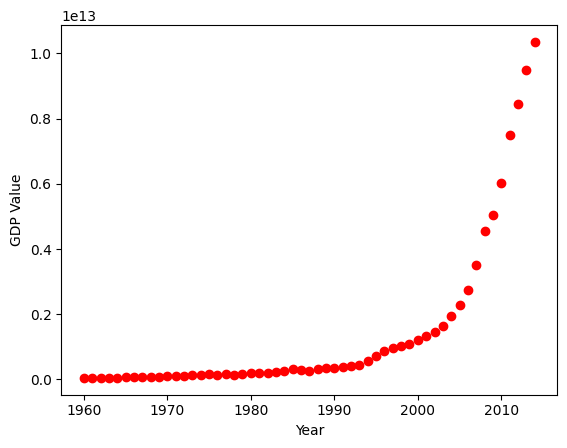

In [12]:
# year vs value plot
x_data = df["Year"].values
y_data = df["Value"].values
plt.plot(x_data, y_data, 'ro')
plt.xlabel("Year")
plt.ylabel("GDP Value")
plt.show()

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}} $$

$ \beta_1$: steepness of curve,

$ \beta_2$: x-axis slide

In [15]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1 * (x - beta_2)))
    return y

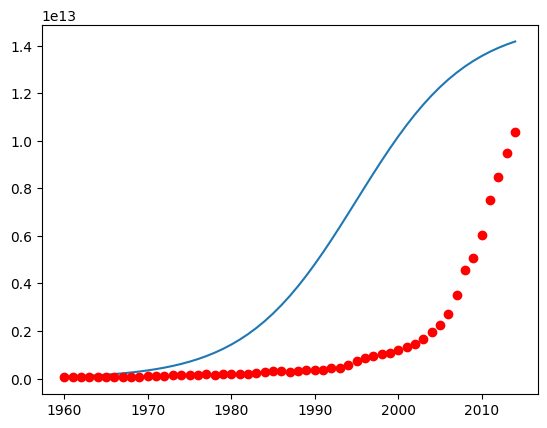

In [29]:
beta_1 = 0.15
beta_2 = 1995.0

# prediction through logistic functionc
y_pred = sigmoid(x_data, beta_1, beta_2)

# plot against prediction and datapoints
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [50]:
# Normalizing our data
xData = x_data/max(x_data)
yData = y_data/max(y_data)

# thorough library and then manually to understand normalization
from scipy.optimize import curve_fit
popt, pcov= curve_fit(sigmoid, xData, yData)
print(f"beta_1 = {popt[0]}, beta_2 = {popt[1]}")



beta_1 = 690.4517092123388, beta_2 = 0.9972071272529931


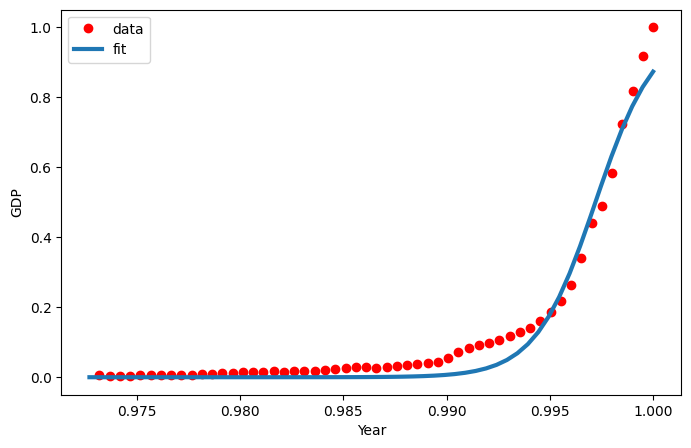

In [51]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
x

plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xData, yData, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [56]:
# Accuracy of the model
msk = np.random.rand(len(df)) < 0.8
x_train = xData[msk]
x_test = xData[~msk]
y_train = yData[msk]
y_test = yData[~msk]

popt, pcov = curve_fit(sigmoid, x_train, y_train)
y_hat = sigmoid(x_test, *popt)

print(f"Mean absolute error: {np.mean(np.absolute(y_hat - y_test)):0.2f}")
print(f"Mean squared error: {np.mean((y_hat - y_test) ** 2)}")
print(f"beta_1 = {popt[0]:0.2f}, beta_2 = {popt[1]:0.2f}")

from sklearn.metrics import r2_score
print(f"R2-score: {r2_score(y_hat, y_test):0.2f}")

Mean absolute error: 0.02
Mean squared error: 0.000854849385621411
beta_1 = 722.12, beta_2 = 1.00
R2-score: 0.94
